In [1]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))

import numpy as np
import h5py
import matplotlib.pyplot as plt

from session.sessions import selected_009266, selected_009265, selected_008229

%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [29]:
dst_path = '/home/sobolev/nevermind/AG_Pecka/data/processed/'
aep_dur = 0.25  # IPI duration in sec
s_rate  = 1000   # LFP samp rate Hz
dur = int(aep_dur*s_rate)
    
aeps_means = np.zeros([len(selected_008229), dur])
for j, (session, areas) in enumerate(selected_008229.items()):
    animal = session.split('_')[0]
    lfp_file  = os.path.join(dst_path, animal, session, 'lfp.h5')
    meta_file = os.path.join(dst_path, animal, session, 'meta.h5')
    
    with h5py.File(lfp_file, 'r') as f:
        lfp_mx = np.array(f['lfp'])
        
    with h5py.File(meta_file, 'r') as f:
        tl = np.array(f['processed']['timeline'])
        sound_events = np.array(f['processed']['sound_events'])
        
    # fetch LFP channel
    lfp = lfp_mx[:, 0]
    
    # constructing AEP matrix
    aeps = np.zeros([len(sound_events), dur])
    for i, event in enumerate(sound_events[sound_events[:, 1] == 1]):
        idx_event = int(event[0]*s_rate)
        aep = lfp[idx_event:idx_event + dur]
        if len(aep) == dur:
            aeps[i] = aep
        
    aeps_means[j] = aeps.mean(axis=0)
    print('%s processed' % session)

008229_hippoSIT_2022-05-17_21-44-43 processed
008229_hippoSIT_2022-05-16_20-36-44 processed
008229_hippoSIT_2022-05-20_15-54-39 processed
008229_hippoSIT_2022-05-18_14-36-18 processed


In [59]:
# fetch AEPs means from AEPs files
aeps_means = np.zeros([len(selected_008229), dur])
for j, (session, areas) in enumerate(selected_008229.items()):
    animal = session.split('_')[0]
    aeps_file  = os.path.join(dst_path, animal, session, 'AEPs.h5')
    meta_file  = os.path.join(dst_path, animal, session, 'meta.h5')

    with h5py.File(aeps_file, 'r') as f:
        for aep_ds in f['PPC']:
            aeps = np.array(f['PPC'][aep_ds])
    with h5py.File(meta_file, 'r') as f:
        tl = np.array(f['processed']['timeline'])
        sound_events = np.array(f['processed']['sound_events'])
        
    assert(len(sound_events) ==  len(aeps))
    aeps_means[j] = aeps[sound_events[:, 1] == 1].mean(axis=0)
    print(session)

008229_hippoSIT_2022-05-17_21-44-43
008229_hippoSIT_2022-05-16_20-36-44
008229_hippoSIT_2022-05-20_15-54-39
008229_hippoSIT_2022-05-18_14-36-18


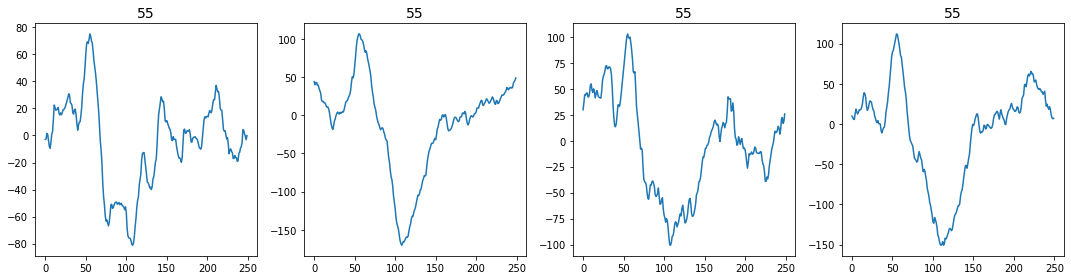

In [60]:
cols = 4
rows = int(np.ceil(len(aeps_means) / 4))
fig = plt.figure(figsize=(15, 4))

peaks = np.zeros(len(aeps_means))
for i, aep in enumerate(aeps_means):
    peak = np.argmax(aep[0:300]) + 0
    ax = fig.add_subplot(rows, cols, i+1)
    ax.plot(aep)
    ax.set_title(peak, fontsize=14)
    peaks[i] = peak
    
fig.tight_layout()

## Head direction / speed from MoSeq

In [10]:
source = '/home/sobolev/nevermind/AG_Pecka/data/processed/'

session = '009265_hippoSIT_2023-02-24_09-53-26'

In [28]:
animal = session.split('_')[0]

s_path     = os.path.join(source, animal, session)
desc_file  = os.path.join(source, animal, session, 'descendants.h5')
meta_file  = os.path.join(source, animal, session, 'meta.h5')

with h5py.File(meta_file, 'r') as f:
    tl = np.array(f['processed']['timeline'])
with h5py.File(desc_file, 'r') as f:
    speed = np.array(f['speed'])
    hd    = np.array(f['hd'])

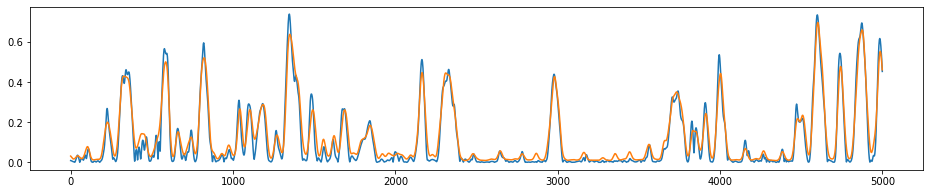

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(16, 3))

idx_l, idx_r = 5000, 10000
ax.plot(tl[:, 3][idx_l:idx_r])
ax.plot(speed[idx_l:idx_r])

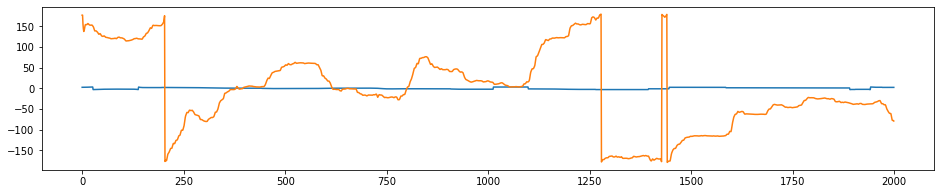

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(16, 3))

idx_l, idx_r = 0, 2000
ax.plot(tl[:, 4][idx_l:idx_r])
ax.plot( np.rad2deg(hd[idx_l:idx_r]) )